<table align="left">
<tr>

<th, style="background-color:white">
<img src="https://github.com/mlgill/ODSC_East_2017_PythonNLP/blob/master/assets/logo.png?raw=true", width=140, height=100>
</th>

<th, style="background-color:white">
<div align="left">
<h1>Learning from Text: <br> Introduction to Natural Language Processing with Python</h1>  
<h2>Michelle L. Gill, Ph.D.</h2>     
Senior Data Scientist, Metis  
ODSC East  
May 3, 2017 
</div>
</th>

</tr>
</table>    

## Classification Walkthrough

We will be using a very famous data set for this walkthrough--the iris data set. This data set contains 50 data points (quite small) on three different iris species. There are four features that are derived from flower measurements: sepal length, sepal width, petal length, petal width. There are three different species represented in the labels.

In [1]:
import warnings
warnings.filterwarnings('ignore', module='seaborn')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

%matplotlib inline

Load the data.

In [2]:
from sklearn.datasets import load_iris

# import some data to play with
iris = load_iris()

# create X (features) and y (response)
X = pd.DataFrame(iris.data,
                 columns = iris.feature_names)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The species names.

In [3]:
y = iris.target
print(iris.target_names, np.unique(y))

['setosa' 'versicolor' 'virginica'] [0 1 2]


## Split the Data into a Train and Test Set

Machine learning models are trained on a subset of the labeled data and then their accuracy (or other metric) is measured on a smaller subset of the data.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

## Fit a Logistic Regression Model

Let's begin by fitting a logistic regression model. Logistic regression is a good, basic classification method to begin with.

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Measure the Accuracy

We will be using accuracy to benchmark our machine learning models. Accuracy measures the percent of data points from the test set where the result was correctly predicted.

In [6]:
from sklearn.metrics import accuracy_score

# Predict values for the test data
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.977777777778


A confusion matrix is a way to view all possible combinations of data and prediction results at once. The values along the diagonal were correctly classified.

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


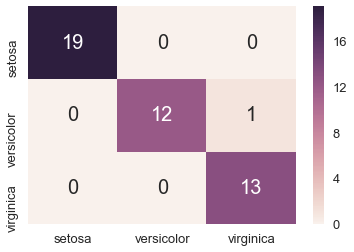

In [8]:
sns.heatmap(cm, xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            annot=True, annot_kws={'fontsize':20});

We can also create a classification report which will give other error metrics for each of the iris species.

In [9]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred, 
                           target_names=iris.target_names)
print(cr)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      0.92      0.96        13
  virginica       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



Other types of models (e.g. SVM, Random Forest, Gradient Boosted Trees) can be fit and evaluated in a similar fashion. Many of these more sophisticated models require some tuning to get the best results.